# Random Agent Performance
A review of performance of random_players, when pitted against one another. 

**First Edit Date**: 1/24/2022<br/>
**Last Edit Date**: 1/24/2022

In [54]:
import matplotlib.pyplot as plt
import numpy as np

from game_assets.table import Table
from game_assets.players.random_player import RandomPlayer

In [49]:
# Plotting constants 
TITLE_FSIZE = 20
LABEL_FSIZE = 16
LEGEND_FSIZE = 16
TICK_LABEL_FSIZE = 12

## Reviewing Team Performance over Time
As a consequense of random card selection and a passing deal, we anticipate that each team, in the long run, will win the same number of games

In [59]:
# set up a table with 4 random players
random_players = [RandomPlayer(i) for i in range(4)]
random_table = Table(*random_players)

In [60]:
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros(n_rounds)
t1_scores = np.zeros(n_rounds)
for i in range(n_rounds):
    # play a hand
    random_table.play_hand()
    # get and record current scores
    t0_scores[i], t1_scores[i] = random_table.get_scores()
    

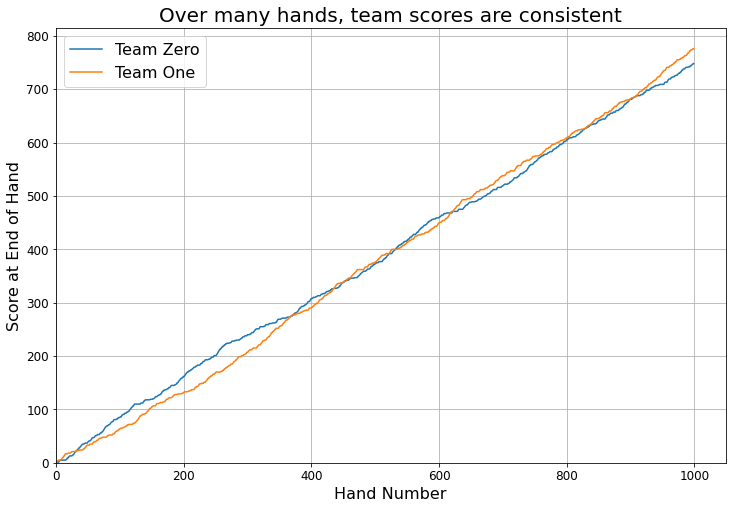

In [61]:
# plot the scores 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_scores, label = "Team Zero")
ax.plot(t1_scores, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title("Over many hands, team scores are consistent", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

In [70]:
# sample out n rounds m times
m_samples = 100
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    random_table = Table(*random_players)
    for j in range(n_rounds):
        # play a hand
        random_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = random_table.get_scores()

In [71]:
#average scores across the trials
t0_score_avg = np.mean(t0_scores, axis = 0)
t1_score_avg = np.mean(t1_scores, axis = 0)

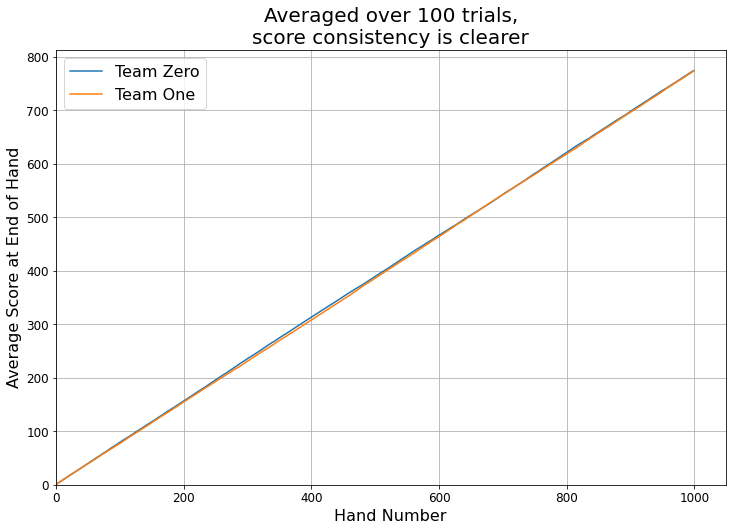

In [72]:
# plot the scores from the averaged trials 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg, label = "Team Zero")
ax.plot(t1_score_avg, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"Averaged over {m_samples} trials,\nscore consistency is clearer", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

## Fixing the Deal
When we force a single player to consistently deal, how does it impact scores? 

In [73]:
# sample out n rounds m times
m_samples = 100
# generate the scores over n rounds 
n_rounds = 1000
# fix the dealer to seat 0
dealer_seat = 0
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    random_table = Table(*random_players)
    for j in range(n_rounds):
        # force the deal to the assigned player
        random_table.dealer = dealer_seat
        # play a hand
        random_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = random_table.get_scores()

In [74]:
#average scores across the trials
t0_score_avg_d0 = np.mean(t0_scores, axis = 0)
t1_score_avg_d0 = np.mean(t1_scores, axis = 0)

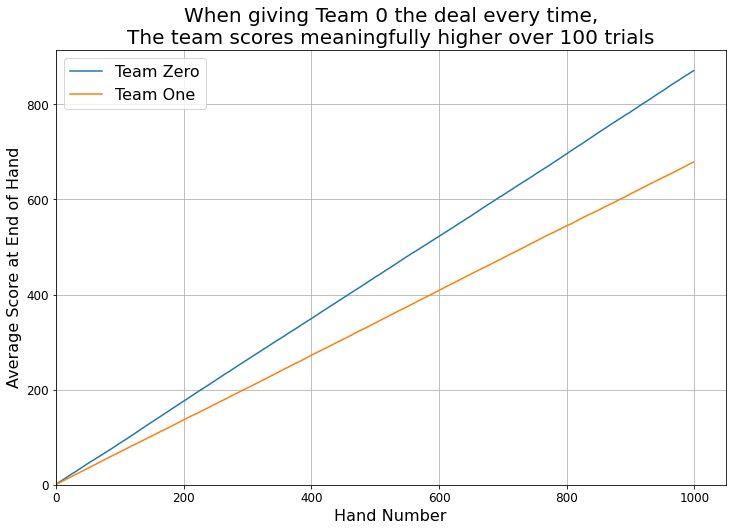

In [75]:
# plot the scores from the averaged trials 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg_d0, label = "Team Zero")
ax.plot(t1_score_avg_d0, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"When giving Team 0 the deal every time,\nThe team scores meaningfully higher over {m_samples} trials", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Above, we see that starting with the deal dramatically improves the performance of the team with the deal. 

My current theory is that because the dealing team is less likely to get stuck with trump, they are less likely to be euchred:
- Odds of a single player calling 'pick up kitty' or setting trump : 25% 
- Odds of P0 or P2 calling pickup or picking trump: (3/16) + (27/256) + (243/4096) 
- Odds of P0 (dealer) being stuck: 0.75^7 = 2187/16384
- Odds of P0 or P2 picking trump: ~48.6%

Even though P1 gets to play the first card each time (and theoretically gets *some* advantage due to the odds of winning if no other player plays trump or a card of the same suit with a higher value), it appears that this value doesn't beat out the risk of being euchred. 

